In [14]:
from mlwpy import *
%matplotlib inline

diabetes = datasets.load_diabetes()

d_tts = skms.train_test_split(diabetes.data,
                              diabetes.target,
                              test_size=25,
                              random_state=42)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt, diabetes_test_tgt) = d_tts

# More Regression Methods

### Regularization

In [4]:
weights = np.array([3.5, -2.1, .7])

print(np.sum(np.abs(weights)),
      np.sum(weights**2))

6.3 17.15


In [5]:
x_1 = np.arange(10)
m, b = 3, 2
w = np.array([m,b])

x = np.c_[x_1, np.repeat(1.0, 10)] #+1

errors = np.tile(np.array([0.0, 1.0, 1.0, .5, .5]), 2)

print(errors * errors)
print(np.dot(errors, errors))

y_true = rdot(w,x)
y_msr = y_true + errors

D = (x, y_msr)


[0.   1.   1.   0.25 0.25 0.   1.   1.   0.25 0.25]
5.0


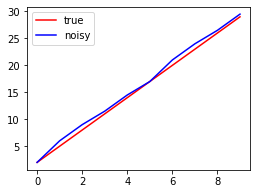

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(x_1, y_true, 'r', label='true')
ax.plot(x_1, y_msr, 'b', label='noisy')
ax.legend();

In [7]:
def sq_diff(a,b):
    return (a-b) **2

In [8]:
predictions = rdot(w,x)
np.sum(sq_diff(predictions, y_msr))

5.0

In [11]:
#predictions = rdot(w, x)
predictions = np.dot(x, w)

loss = np.sum(sq_diff(predictions, y_msr))

complexity_1 = np.sum(np.abs(weights))
complexity_2 = np.sum(weights**2)

cost_1 = loss + complexity_1
cost_2 = loss + complexity_2

print("Sum(abs) complexity:", cost_1)
print("Sum(sqr) complexity:", cost_2)

Sum(abs) complexity: 11.3
Sum(sqr) complexity: 22.15


In [12]:
predictions = np.dot(x, w)

errors = np.sum(sq_diff(predictions, y_msr))
complexity_1 = np.sum(np.abs(weights))

C = .5
cost = errors + C * complexity_1
cost

8.15

In [15]:
models = [linear_model.Lasso(),
          linear_model.Ridge()]

for model in models:
    model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    train_preds = model.predict(diabetes_train_ftrs)
    test_preds = model.predict(diabetes_test_ftrs)
    print(get_model_name(model),
          "\n Train MSE:",metrics.mean_squared_error(diabetes_train_tgt,
                                                    train_preds),
          "\n Test MSE:", metrics.mean_squared_error(diabetes_test_tgt,
                                                     test_preds))

Lasso 
 Train MSE: 3820.0134219175256 
 Test MSE: 4495.87363617216
Ridge 
 Train MSE: 3261.2496650944668 
 Test MSE: 3787.6138492887926


## 9.2 Support Vector Regression

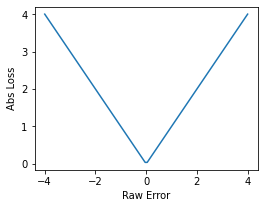

In [16]:
#!! cost = loss + complexity
#hinge loss - want to measure what happens when we are wrong and ignore small errors

#here we don't ignore small errors
error = np.linspace(-4, 4, 100)
loss = np.abs(error)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error,loss)

ax.set_xlabel("Raw Error")
ax.set_ylabel("Abs Loss");

In [17]:
an_error = .75
abs_error = abs(an_error)

if abs_error < 1.0:
    the_loss = 0.0
    
else:
    the_loss = abs_error
print(the_loss)

0.0


In [18]:
an_error = 0.75
adj_error = abs(an_error) - 1.0

if adj_error < 0.0:
    the_loss = 0.0
else:
    the_loss = adj_error
    
print(the_loss)

0.0


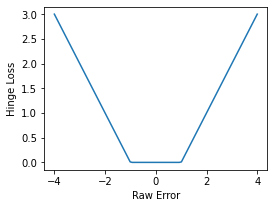

In [23]:
error = np.linspace(-4, 4, 100)

#here we ignore errors up to 1.0 by taking bigger value
loss = np.maximum(np.abs(error) - 1.0,
                  np.zeros_like(error))

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error, loss)

ax.set_xlabel("Raw Error")
ax.set_ylabel("Hinge Loss");

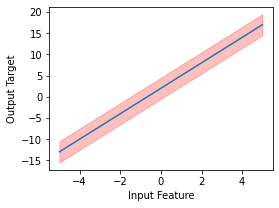

In [24]:
threshold = 2.5

xs = np.linspace(-5,5,100)
ys_true = 3 * xs + 2

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xs, ys_true)
ax.fill_between(xs, ys_true-threshold, ys_true+threshold,
                color=(1.0,0,0,.25))

ax.set_xlabel("Input Feature")
ax.set_ylabel("Output Target");

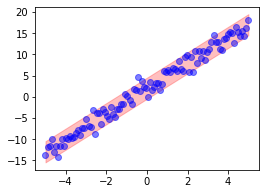

In [26]:
threshold = 2.5

xs = np.linspace(-5,5,100)
ys = 3 * xs + 2 + np.random.normal(0,1.5,100)

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xs, ys, 'o', color=(0,0,1.0,.5))
ax.fill_between(xs, ys_true - threshold, ys_true + threshold,
                color=(1.0,0,0,.25));

In [27]:
#hyperparameters
C, epsilon = 1.0, .25

#epsilon is the threshold of errors we tolerate

#parameters
weights = np.array([1.3])

In [28]:
#predictions, error, loss
predictions = np.dot(xs.reshape(-1,1), weights)
errors = ys - predictions

loss_sse = np.sum(errors ** 2)
loss_sae = np.sum(np.abs(errors))
loss_hinge = np.sum(np.max(np.abs(errors) - epsilon, 0))


In [29]:
#complexity penalty for regularization
complexity_saw = np.sum(np.abs(weights))
complexity_ssw = np.sum(weights ** 2)

In [31]:
#cost
cost_gof_regression = loss_sse + 0.0
cost_L1pen_regression = loss_sse + C * complexity_saw
cost_L2pen_regression = loss_sse + C * complexity_ssw
cost_sv_regression = loss_hinge + C * complexity_ssw

In [32]:
print(cost_gof_regression)
print(cost_L1pen_regression)
print(cost_L2pen_regression)
print(cost_sv_regression)

3066.14774599898
3067.4477459989803
3067.83774599898
13.06617882838413


In [36]:
svrs = [svm.SVR(),       #default epsilon=0.1
        svm.NuSVR()]     #default nu=0.5

for model in svrs:
    preds = (model.fit(diabetes_train_ftrs, diabetes_train_tgt)
                  .predict(diabetes_test_ftrs))
    print(metrics.mean_squared_error(diabetes_test_tgt, preds))

6459.265428440977
6064.360099407078
